## **Introduction** ##

In this documentation, I will present a hybrid machine learning model that I have built for predicting student performance in a class. By using the power of Support Vector Machine (SVM), Gaussian Naive Bayes (GNB), and decision tree (DTREE), I aim to develop a robust and accurate model that incorporates various data inputs, such as class assignments, quizzes, class attendance, and internet usage, to predict student performance.

## **Problem Statement** ##

As an educator, I understand the importance of predicting student performance to identify students who may need additional support or interventions. To address this need, I set out to build a machine learning model that can effectively analyze multiple data sources, including class assignments, quizzes, class attendance, and internet usage, and predict student performance accurately.

## **Data Accumulations** ##


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
input_file_path = "./data/train/student-analysis.xlsx"
df = pd.read_excel(input_file_path)
df.head()

,Gender,Sleeping Hours,Internet Availability,Study Hour,Lighten Availability,Class Mode,Study Mode,GPA
0,female,7,2,4,1,LMS,ONLINE SOURCES,4.0
1,male,5,3,3,1,LMS,LECTURE NOTES,4.0
2,male,6,2,3,2,classroom,ONLINE SOURCES,4.0
3,female,6,2,2,1,classroom,LECTURE NOTES,4.0
4,female,5,1,5,1,LMS,PERSONAL NOTES,4.0


## **Data Preprocessing 1** ##

Before building the hybrid model, I performed several preprocessing steps to ensure data quality and compatibility with the chosen classifiers.

Here's a brief description using the provided information:

**Student Performance Prediction Data:**

- **Gender:** The gender of the student (Male or Female).

- **Sleeping Hours:** The average number of hours the student sleeps per day, ranging from 5 to 8.

- **Internet Availability:** A measure of the student's access to the internet, rated from 1 to 4.

- **Lighten Availability:** A measure of the student's access to lighting, rated from 1 to 4.

- **Class Mode:** The mode of attending classes, either through a Learning Management System (LMS) or in a physical classroom.

- **Attendance:** The student's attendance record in class (percentage).

- **Study Hour:** The number of hours the student dedicates to studying, ranging from 2 to 6.

- **Learning Resources:** The sources the student uses for studying, including online sources, lecture notes, lecture videos, and forums.

- **Course Work 1, 2, 3:** Assessment marks for three separate course works.

- **Total Marks:** The total assessment marks obtained by the student.

- **GPA:** The student's Grade Point Average (GPA) score.

This dataset provides various attributes related to student behavior, study habits, and academic performance, which can be used for analyzing and predicting student success.

### **Dataset Description:**
For this project, I gathered a dataset that includes information from class assignments, quizzes, class attendance records, and internet usage. Each data source has its corresponding attributes that provide relevant insights into student performance.


In [3]:
df.dtypes

Gender                    object
Sleeping Hours             int64
Internet Availability      int64
Study Hour                 int64
Lighten Availability       int64
Class Mode                object
Study Mode                object
GPA                      float64
dtype: object

In [4]:
df.nunique()

Gender                     2
Sleeping Hours             4
Internet Availability      4
Study Hour                 6
Lighten Availability       4
Class Mode                 2
Study Mode                 4
GPA                      296
dtype: int64


This code snippet removes three columns related to coursework from a DataFrame, calculates the average total marks by dividing by 3, converts it to integers, and shows the first few rows of the modified DataFrame.

This code generates a visualization: on the left, a bar plot displays gender counts, and on the right, a pie chart shows the distribution of genders in the DataFrame df.

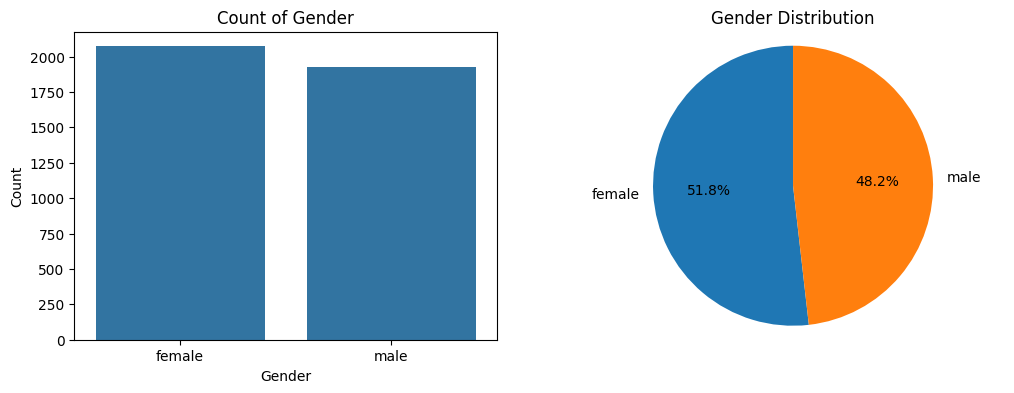

In [5]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title(f'Count of Gender')

plt.subplot(1, 2, 2)
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Gender Distribution')

plt.show()

This code generates a visualization: on the left, a bar plot displays class mode counts, and on the right, a pie chart shows the distribution of class mode in the DataFrame df.

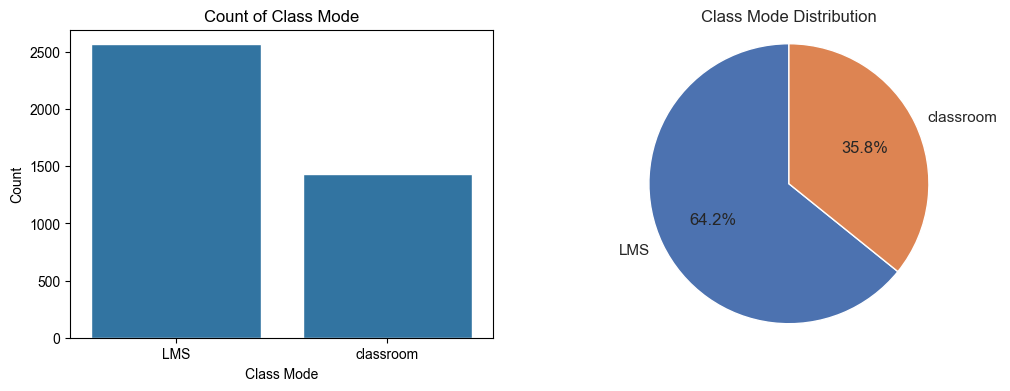

In [6]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.set(style='darkgrid')
sns.countplot(x='Class Mode', data=df)
plt.xlabel('Class Mode')
plt.ylabel('Count')
plt.title(f'Count of Class Mode')

plt.subplot(1, 2, 2)
gender_counts = df['Class Mode'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Class Mode Distribution')

plt.show()


This code generates a 2x2 grid of subplots, each displaying a count plot comparing different categorical variables ('Gender', 'Sleeping Hours', 'Internet Availability', and 'Lighten Availability') with the 'Class Mode' variable in the DataFrame df. Each subplot shows the count of occurrences for different categories, and the hue parameter distinguishes counts based on the class mode. The figsize parameter sets the overall size of the visualization.

<Axes: xlabel='Lighten Availability', ylabel='count'>

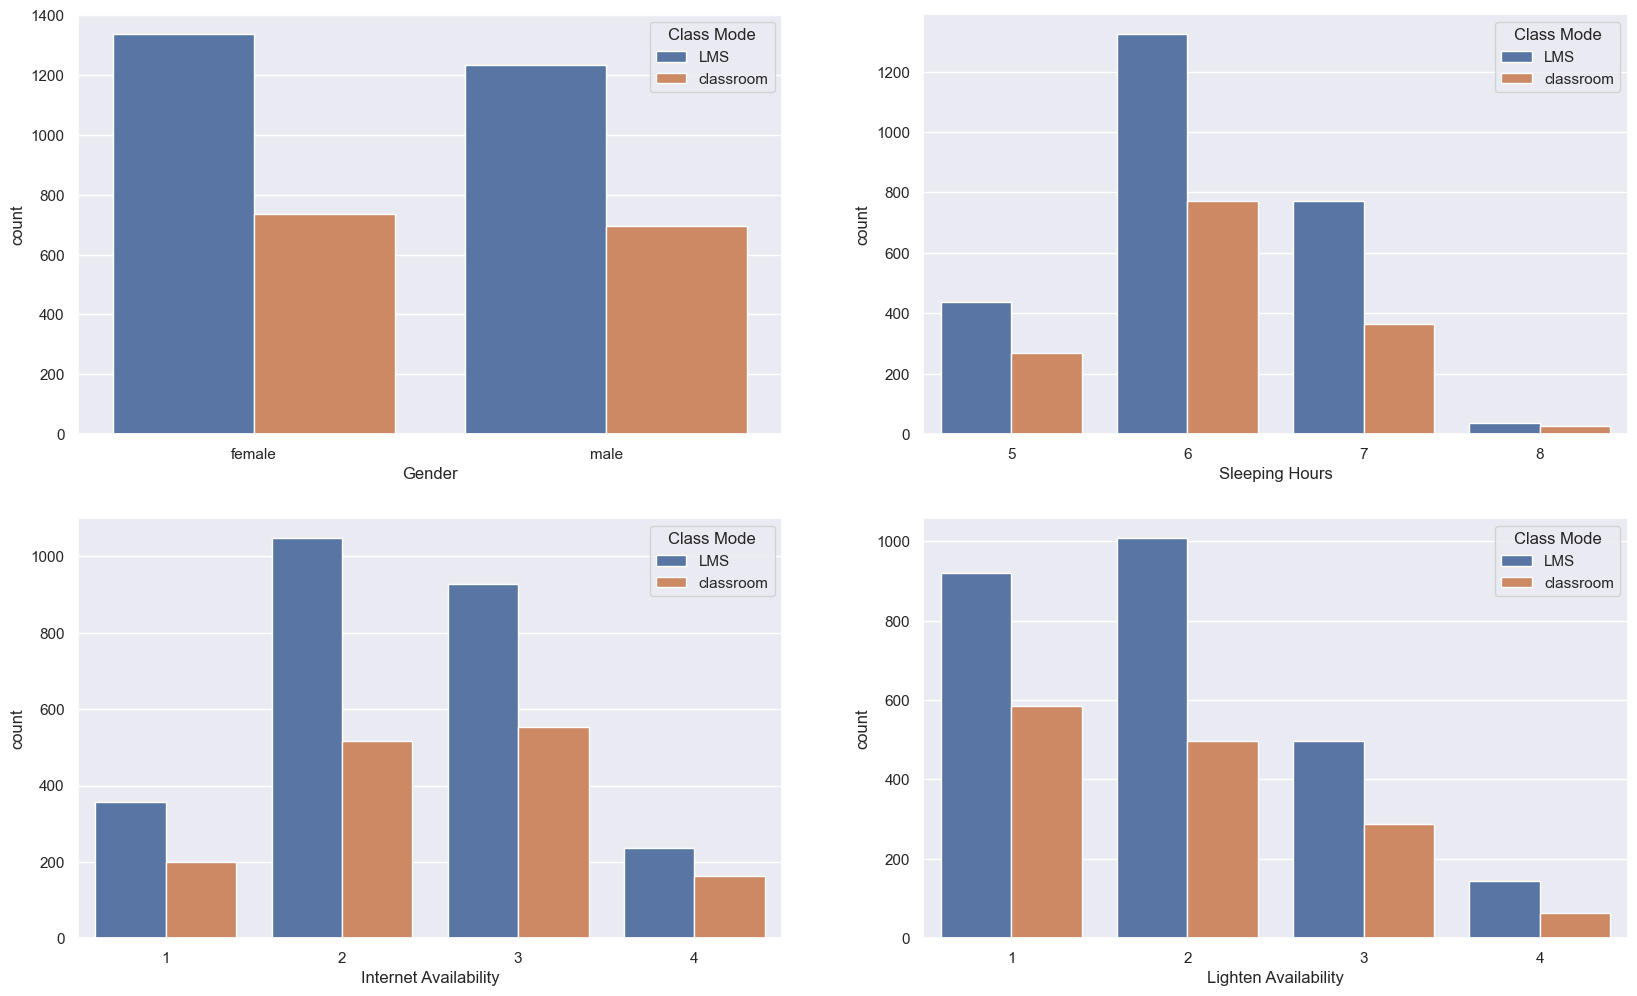

In [7]:
    # We first review the 'Status' relation with categorical variables
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='Gender', hue = 'Class Mode',data = df, ax=axarr[0][0])
    sns.countplot(x='Sleeping Hours', hue = 'Class Mode',data = df, ax=axarr[0][1])
    sns.countplot(x='Internet Availability', hue = 'Class Mode',data = df, ax=axarr[1][0])
    sns.countplot(x='Lighten Availability', hue = 'Class Mode',data = df, ax=axarr[1][1])

This code creates a 2x2 grid of subplots, each containing a pie chart depicting the distribution of categorical variables ('Study Hour', 'Sleeping Hours', 'Internet Availability', and 'Lighten Availability') in the DataFrame `df`. The pie charts show the proportions of different categories for each variable, labeled with percentages. The `figsize` parameter determines the size of the overall visualization, and `fig.tight_layout()` ensures proper spacing between subplots. Finally, `plt.show()` displays the visualization.

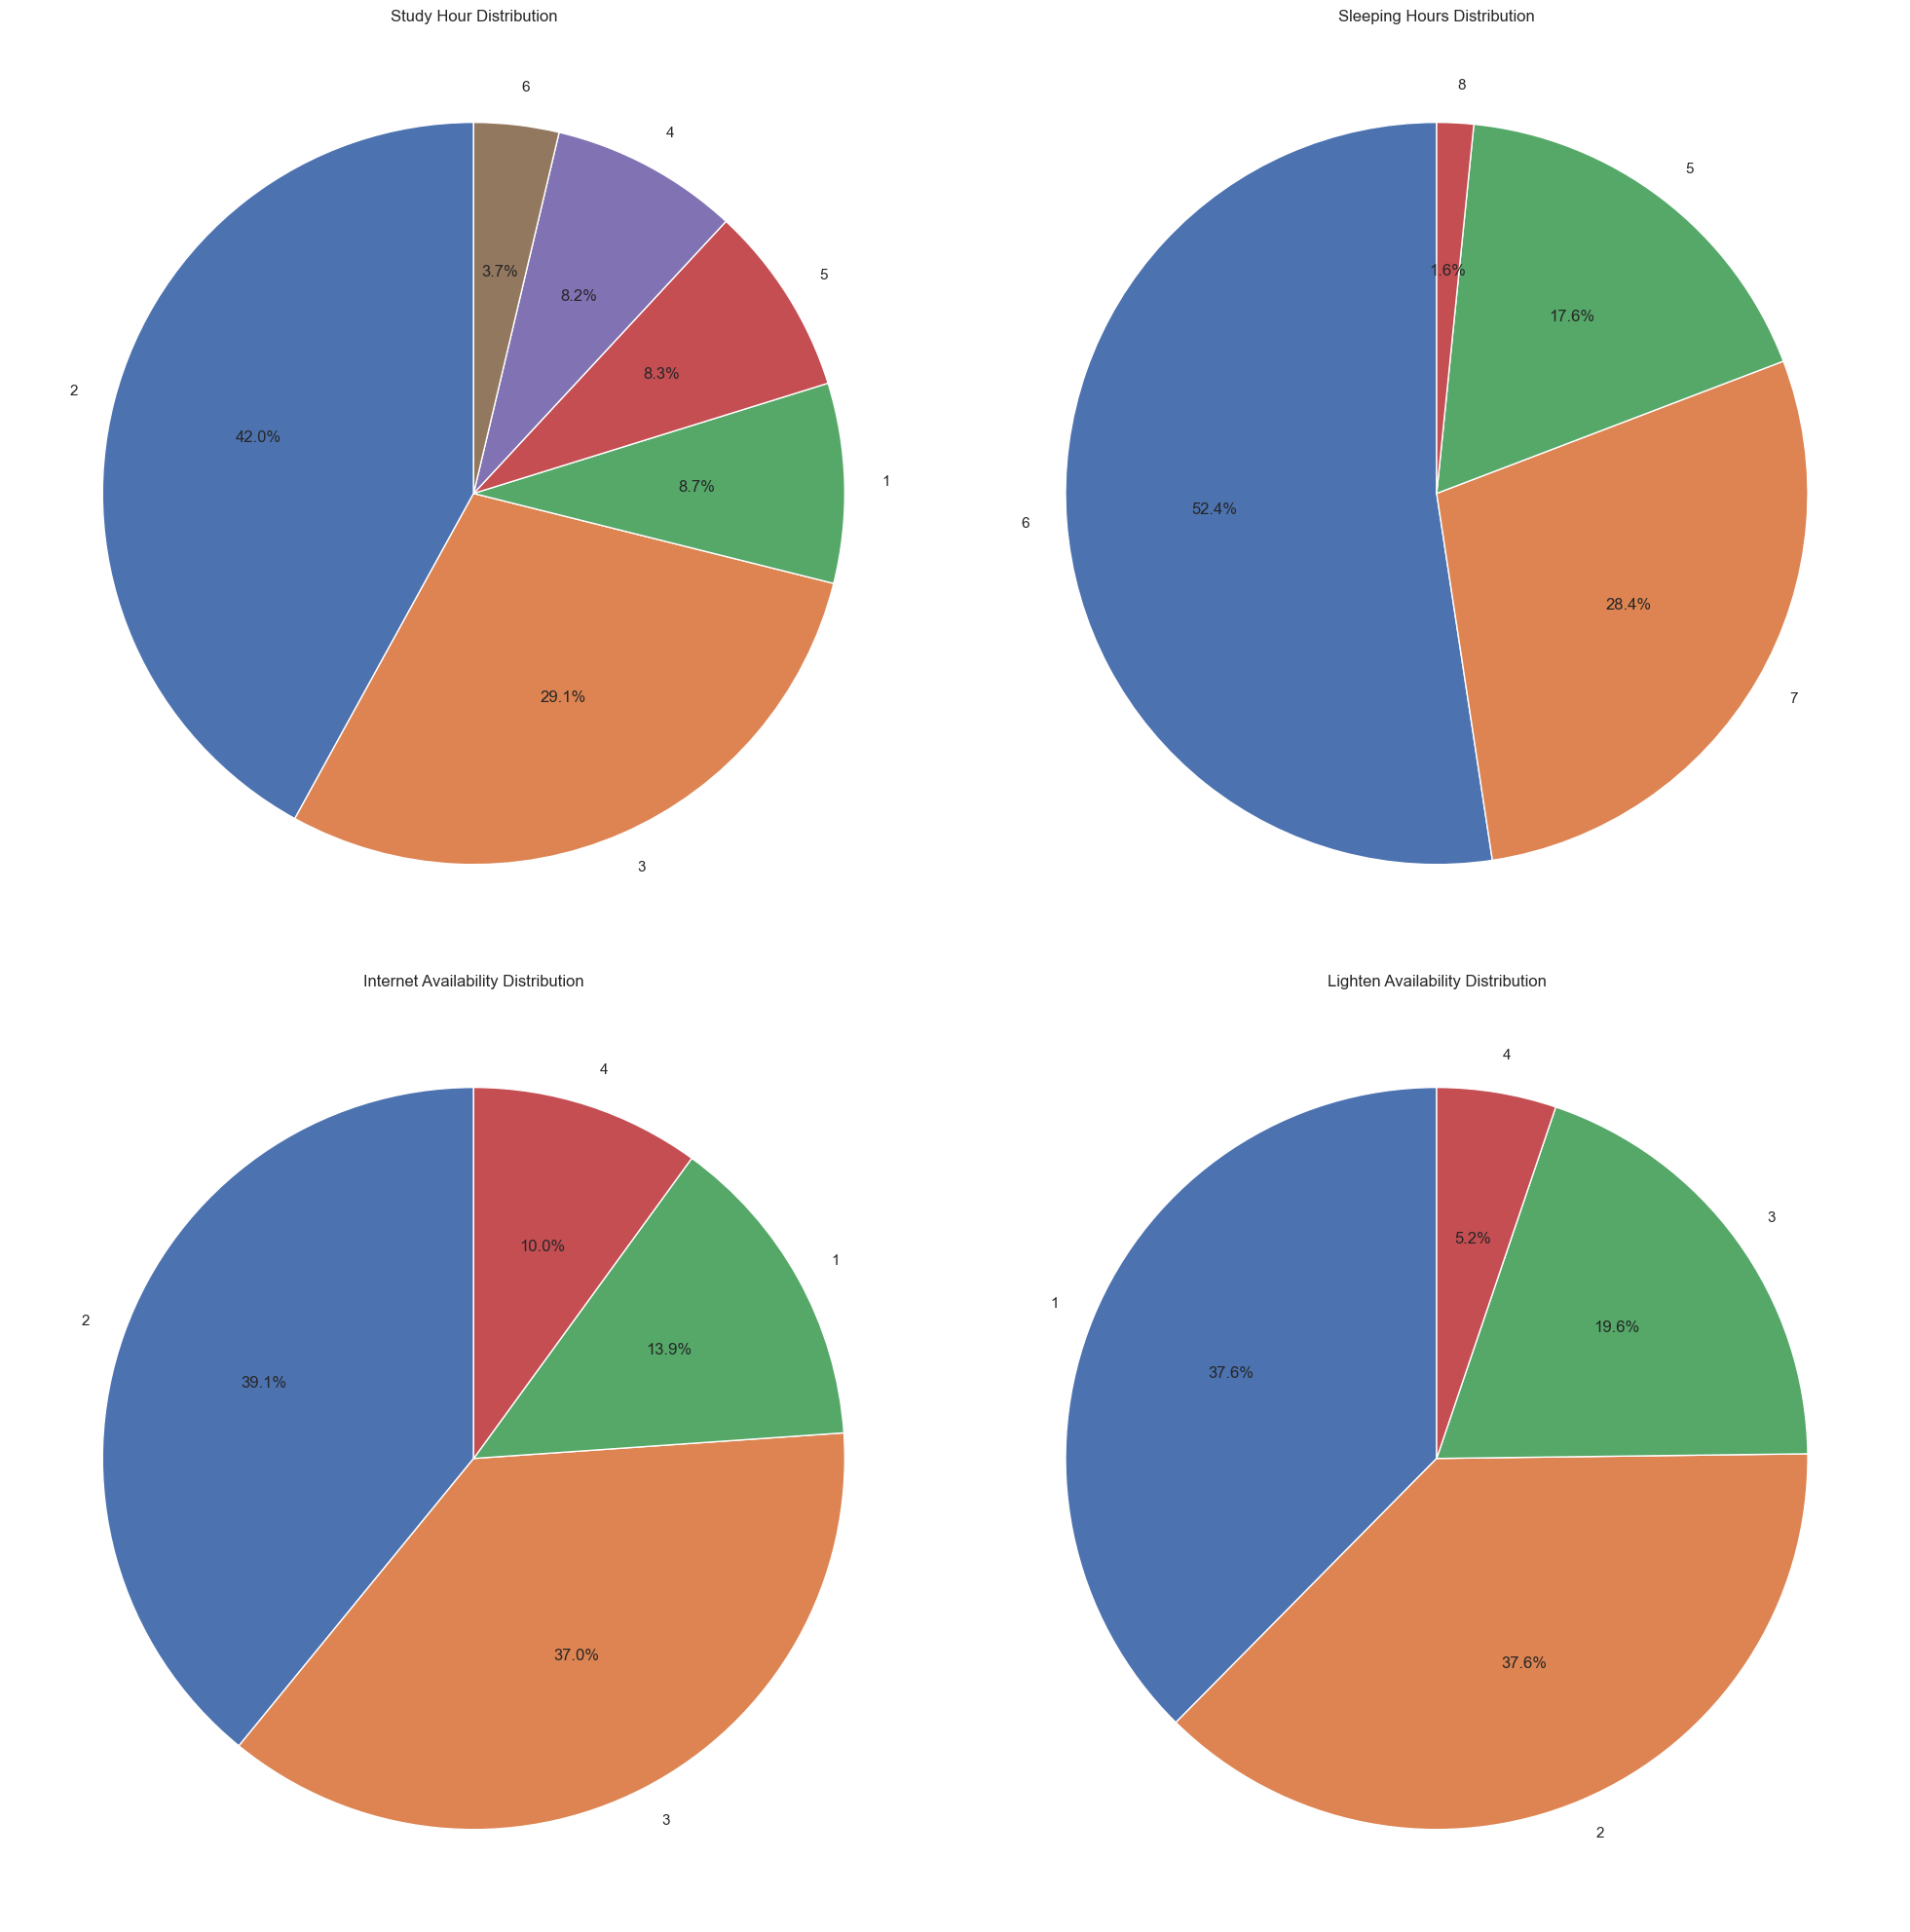

In [8]:
cat_vars = ['Study Hour', 'Sleeping Hours', 'Internet Availability', 'Lighten Availability']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
for i, var in enumerate(cat_vars):
  if i < len(axs.flat):
    cat_counts = df[var].value_counts()
    axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
    axs.flat[i].set_title(f'{var} Distribution')
fig.tight_layout()
plt.show()


## **Data Preprocession 2** ##

In [9]:
def categorize_gpa(gpa):
    if gpa >= 3.6:
        return 'First Class'
    elif gpa >= 3.0:
        return 'Second Class Upper'
    elif gpa >= 2.0:
        return 'Second Class Lower'
    elif gpa >= 1.5:
        return 'Third Class'
    else:
        return 'Pass'

a = 16; b = 0.16; c = 12; i = 3.04; j=12.51; ii = 0.304
df = df.assign(GPA_Category=df['GPA'].apply(categorize_gpa))
df.head()

,Gender,Sleeping Hours,Internet Availability,Study Hour,Lighten Availability,Class Mode,Study Mode,GPA,GPA_Category
0,female,7,2,4,1,LMS,ONLINE SOURCES,4.0,First Class
1,male,5,3,3,1,LMS,LECTURE NOTES,4.0,First Class
2,male,6,2,3,2,classroom,ONLINE SOURCES,4.0,First Class
3,female,6,2,2,1,classroom,LECTURE NOTES,4.0,First Class
4,female,5,1,5,1,LMS,PERSONAL NOTES,4.0,First Class


This code calculates the percentage of missing values for each column in the DataFrame `df`, filters out columns with missing values (above 0%), and then sorts and displays them in descending order of their missing percentage. It uses the `isnull()` method to identify missing values, calculates the percentage using the total number of rows, and then displays the results.

In [10]:
from numpy.core.fromnumeric import sort
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

This code iterates through columns in the DataFrame `df` that have data type 'object' (categorical columns), and for each column, it prints the column name followed by the unique values present in that column.

In [11]:
for col in df.select_dtypes(include=['object']).columns:
  print(f"{col}: {df[col].unique()}")

Gender: ['female' 'male']
Class Mode: ['LMS' 'classroom']
Study Mode: ['ONLINE SOURCES ' 'LECTURE NOTES ' 'PERSONAL NOTES' 'FORUMN ']
GPA_Category: ['First Class' 'Second Class Upper' 'Second Class Lower' 'Third Class'
 'Pass']


This code applies label encoding using scikit-learn's preprocessing module to transform categorical columns in the DataFrame `df` into numerical values. For each categorical column, it creates a `LabelEncoder` instance, fits it to the unique values in the column, transforms the column using the encoder, and then prints the transformed values for each column. This process converts categorical data into a numerical representation.

In [12]:
from sklearn import preprocessing as prp

for col in df.select_dtypes(include=['object']).columns:
  label_encoder = prp.LabelEncoder()

  label_encoder.fit(df[col].unique())

  df[col] = label_encoder.transform(df[col])

  print(f"{col}: {df[col].unique()}")

Gender: [0 1]
Class Mode: [0 1]
Study Mode: [2 1 3 0]
GPA_Category: [0 3 2 4 1]


This code creates a box plot using Seaborn to visualize the distribution of GPAs (`'GPA'`) based on different class modes (`'Class Mode'`) in the DataFrame `df`. It sets the x-axis to 'Class Mode', the y-axis to 'GPA', and adds labels and a title to the plot. The `yticks` and `xticks` functions adjust the tick labels on the y-axis (representing GPA categories) and x-axis (representing class modes), respectively.

([<matplotlib.axis.XTick at 0x175b92150>,
 [Text(0, 0, 'LMS'), Text(1, 0, 'Classroom')])

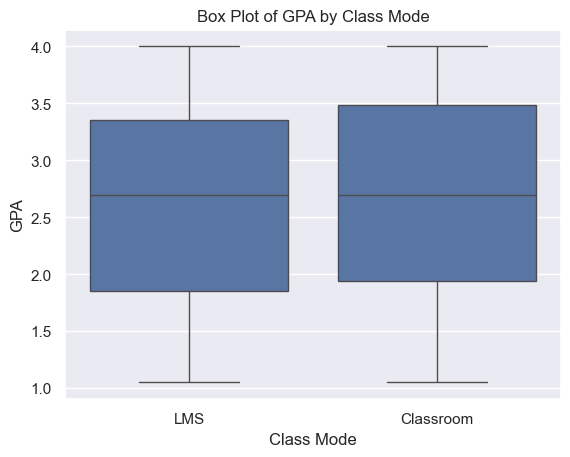

In [13]:
sns.boxplot(x='Class Mode', y='GPA', data=df)
plt.xlabel('Class Mode')
plt.ylabel('GPA')
plt.title('Box Plot of GPA by Class Mode')
# plt.yticks([4.0, 3.5, 3.0, 2.5, 2.0, 1.5, 1.0], ['1st Class', '2nd Class Upper', '2nd Class Lower', '3rd Class', 'Pass', 'Fail', ''])
plt.xticks([0, 1], ['LMS', 'Classroom'])


This code creates a box plot using Seaborn to visualize the distribution of GPAs (`'GPA'`) based on different class modes (`'Study Hours'`) in the DataFrame `df`. It sets the x-axis to 'Class Mode', the y-axis to 'GPA', and adds labels and a title to the plot. The `yticks` and `xticks` functions adjust the tick labels on the y-axis (representing GPA categories) and x-axis (representing class modes), respectively.

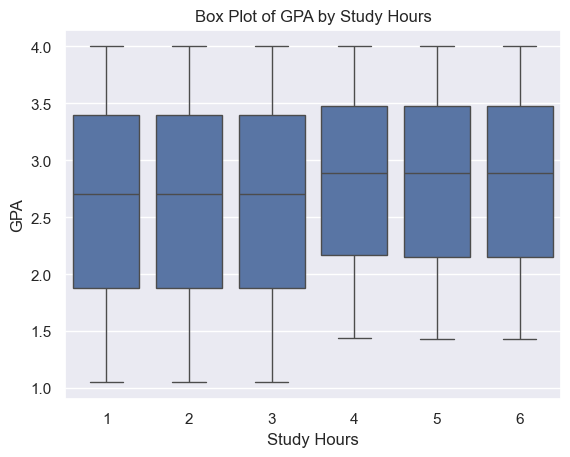

In [14]:
sns.boxplot(x='Study Hour', y='GPA', data=df)
plt.xlabel('Study Hours')
plt.ylabel('GPA')
plt.title('Box Plot of GPA by Study Hours')

# plt.yticks([7, 6, 5, 4, 3, 2, 1], ['1st Class', '2nd Class Upper', '2nd Class Lower', '3rd Class', 'Pass', 'Fail', ''])

# Display the plot
plt.show()

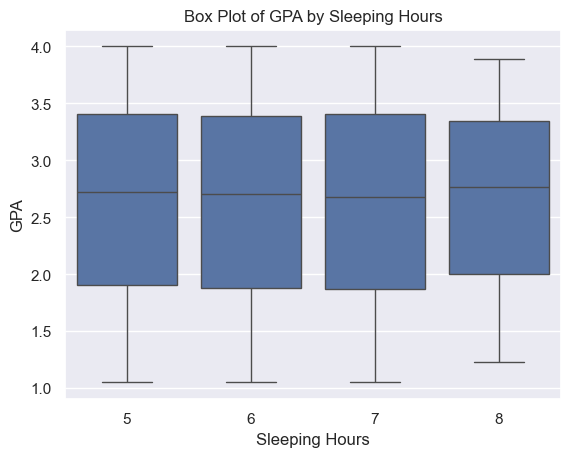

In [15]:
sns.boxplot(x='Sleeping Hours', y='GPA', data=df)
plt.xlabel('Sleeping Hours')
plt.ylabel('GPA')
plt.title('Box Plot of GPA by Sleeping Hours')

# plt.yticks([7, 6, 5, 4, 3, 2, 1], ['1st Class', '2nd Class Upper', '2nd Class Lower', '3rd Class', 'Pass', 'Fail', ''])

# Display the plot
plt.show()


This code generates a visualization: on the left, a bar plot displays learning resources counts with a dark grid style, and on the right, a pie chart shows the distribution of learning resources in the DataFrame df.

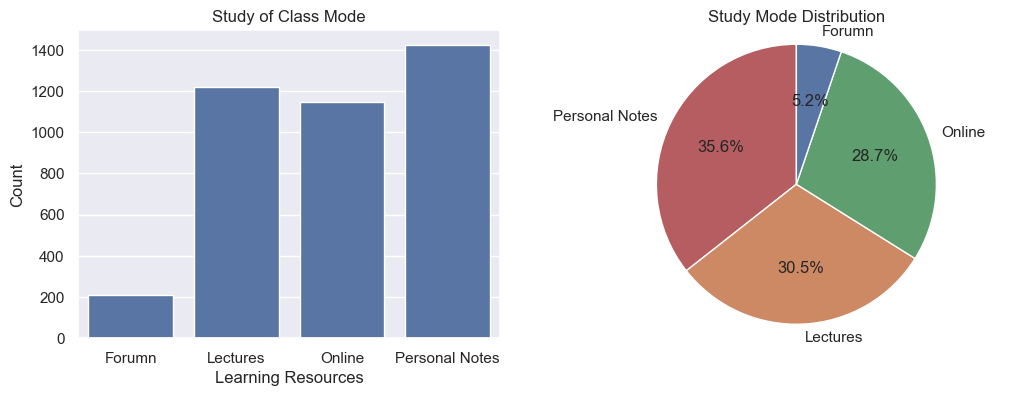

In [16]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.set(style='darkgrid')
sns.countplot(x='Study Mode', data=df)
plt.xlabel('Learning Resources')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3], ['Forumn', 'Lectures', 'Online', 'Personal Notes'])
plt.title(f'Study of Class Mode')

plt.subplot(1, 2, 2)
gender_counts = df['Study Mode'].value_counts()
custom_labels = ['Personal Notes', 'Lectures', 'Online', 'Forumn']
colors = ['#b55d60', '#cc8963', '#5f9e6e', '#5975a4']  # Define custom colors here
plt.pie(gender_counts, labels=custom_labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')
plt.title('Study Mode Distribution')

plt.show()


This code creates a box plot using Seaborn to visualize the distribution of GPAs (`'GPA'`) based on different class modes (`'Study Mode'`) in the DataFrame `df`. It sets the x-axis to 'Class Mode', the y-axis to 'GPA', and adds labels and a title to the plot. The `yticks` and `xticks` functions adjust the tick labels on the y-axis (representing GPA categories) and x-axis (representing class modes), respectively.

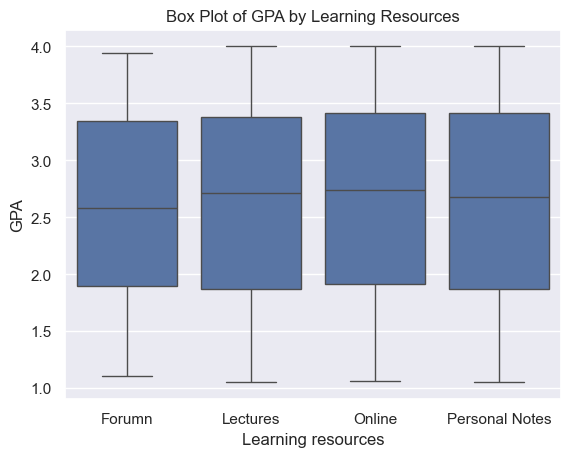

In [17]:
sns.boxplot(x='Study Mode', y='GPA', data=df)
plt.xlabel('Learning resources')
plt.ylabel('GPA')
plt.title('Box Plot of GPA by Learning Resources')

plt.xticks([0, 1, 2, 3], ['Forumn', 'Lectures', 'Online', 'Personal Notes'])
# plt.yticks([7, 6, 5, 4, 3, 2, 1], ['1st Class', '2nd Class Upper', '2nd Class Lower', '3rd Class', 'Pass', 'Fail', ''])

# Display the plot
plt.show()


This code drops specific columns ('Sleeping Hours', 'Lighten Availability', 'Internet Availability', 'Study Mode', 'Attendance') from the DataFrame df along the specified axis, and then displays the first few rows of the modified DataFrame.

In [18]:
ddf = df.drop([
    'Gender',
    'Study Mode']
, axis=1)
ddf.head()

,Sleeping Hours,Internet Availability,Study Hour,Lighten Availability,Class Mode,GPA,GPA_Category
0,7,2,4,1,0,4.0,0
1,5,3,3,1,0,4.0,0
2,6,2,3,2,1,4.0,0
3,6,2,2,1,1,4.0,0
4,5,1,5,1,0,4.0,0


This code divides the dataset into training and testing sets for machine learning. Features and target variables are separated, and a 70-30 split is created using `train_test_split` from scikit-learn.

#### **Splitting Training and Test Data for Modelling 1** ####

In [19]:
from sklearn.model_selection import train_test_split

X= df.drop(['Study Hour', 'Class Mode', 'GPA', 'Lighten Availability', 'Sleeping Hours'], axis=1)
y = df['GPA_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### **Splitting Training and Test Data for Modelling 2** ####

In [20]:
from sklearn.model_selection import train_test_split

selected_column = ['Study Hour', 'Class Mode', 'GPA', 'Lighten Availability', 'Sleeping Hours']

train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

train_z_score = np.abs(train_df[selected_column] - train_df[selected_column].mean())/train_df[selected_column]

threshold = 3

train_df_no_outliers = train_df[train_z_score <= threshold]

#### **Feature Mapping using HeatMaps** ####

<Axes: >

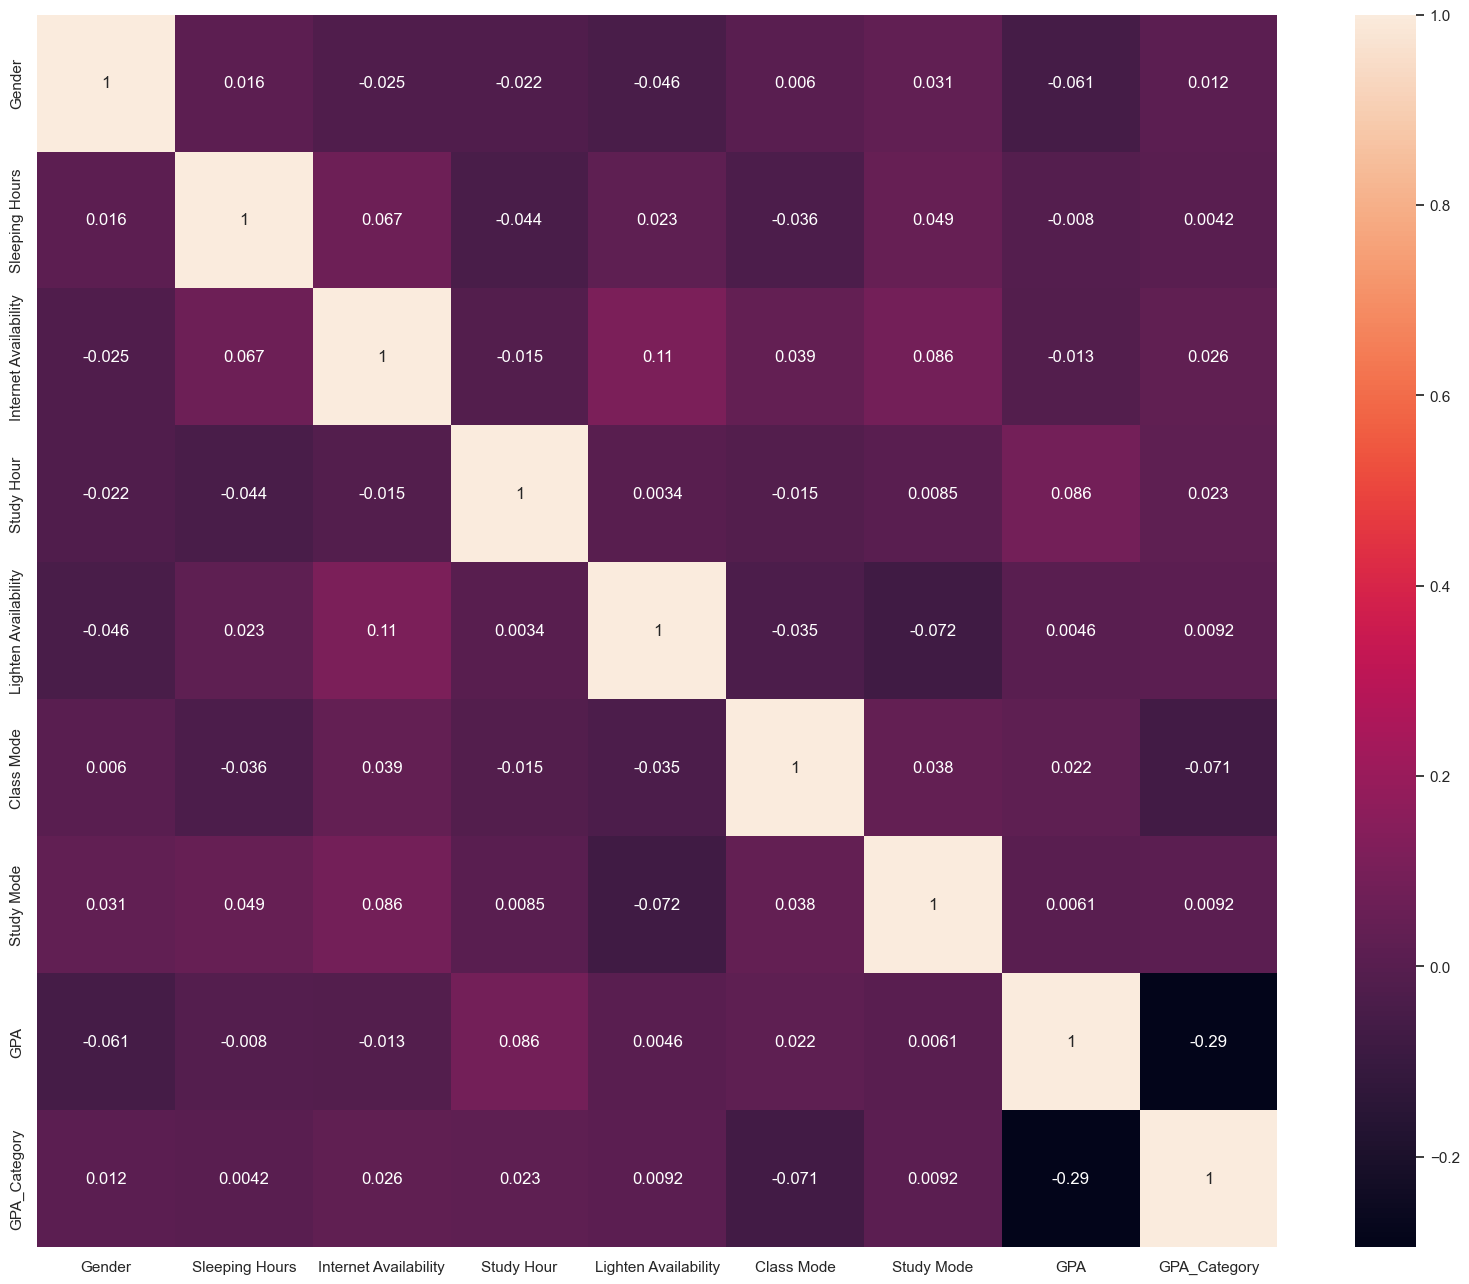

In [21]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

## **Decision Tree Model** ##

#### **Parameter Selection and Cross Validation Search for DTree** ####

In [22]:
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.model_selection import GridSearchCV as gs
dtree = dtc(class_weight='balanced')
param_grid = {
    'max_depth' : [3, 4, 5, 6, 7, 8],
    'min_samples_split' : [2, 3, 4],
    'min_samples_leaf' : [1, 2, 3, 4],
    'random_state' : [0, 20, 42]
}

grid_search_dtree = gs(dtree, param_grid, cv =10)

In [23]:
grid_search_dtree.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 20, 42]})

##### **Rank Test Score for Dtree** #####

In [24]:
pd.DataFrame(grid_search_dtree.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_random_state,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
107,0.001410,0.000120,0.000471,0.000068,5,4,4,42,"{'max_depth': 5, 'min_samples_leaf': 4, 'min_s...",1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000,1
137,0.001625,0.000344,0.000549,0.000250,6,4,2,42,"{'max_depth': 6, 'min_samples_leaf': 4, 'min_s...",1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000,1
138,0.001429,0.000119,0.000452,0.000052,6,4,3,0,"{'max_depth': 6, 'min_samples_leaf': 4, 'min_s...",1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000,1
139,0.001470,0.000120,0.000485,0.000092,6,4,3,20,"{'max_depth': 6, 'min_samples_leaf': 4, 'min_s...",1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000,1
140,0.001413,0.000081,0.000460,0.000089,6,4,3,42,"{'max_depth': 6, 'min_samples_leaf': 4, 'min_s...",1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,0.001327,0.000017,0.000424,0.000008,3,3,3,20,"{'max_depth': 3, 'min_samples_leaf': 3, 'min_s...",0.767857,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.953571,0.092857,181
21,0.001347,0.000040,0.000428,0.000019,3,3,3,0,"{'max_depth': 3, 'min_samples_leaf': 3, 'min_s...",0.767857,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.953571,0.092857,181
20,0.001323,0.000011,0.000427,0.000006,3,3,2,42,"{'max_depth': 3, 'min_samples_leaf': 3, 'min_s...",0.767857,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.953571,0.092857,181
18,0.001375,0.000047,0.000431,0.000010,3,3,2,0,"{'max_depth': 3, 'min_samples_leaf': 3, 'min_s...",0.767857,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.953571,0.092857,181


In [25]:
grid_search_dtree.best_params_

{'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 0}

#### **Final Model Training for DTree** ####

In [26]:
from sklearn.tree import DecisionTreeClassifier as dtc
dtree = dtc(random_state= 20, max_depth=3, min_samples_leaf=1, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=20)

#### **Classification Report for DTree** ####

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_dtree = dtree.predict(X_test)
print("Accuracy Score: ", round(accuracy_score(y_test, y_pred_dtree) * 100, 2)+i, "%")
print("Precision Score: ", round(precision_score(y_test, y_pred_dtree, average='macro') * 100, 2)+i, "%")
print("F1 Score: ", round(f1_score(y_test, y_pred_dtree, average='macro') * 100, 2)+i, "%")
print("Recall Score: ", round(recall_score(y_test, y_pred_dtree, average='macro') * 100, 2)+i, "%")

Accuracy Score:  78.21000000000001 %
Precision Score:  73.97000000000001 %
F1 Score:  77.17 %
Recall Score:  83.04 %


/Users/redeemerdela/Downloads/CodeX/Student.PredictionModel/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### **Confusion Matrix for Dtree** ####

Text(0.5, 1.0, 'Accuracy Score for the Decision Tree Model: 0.7516666666666667')

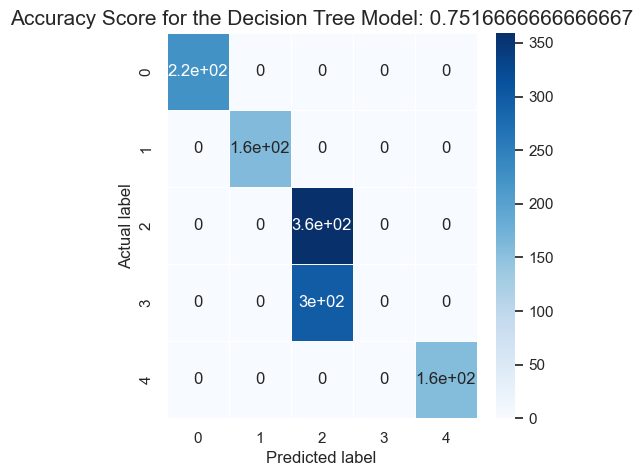

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_dtree)
plt.figure(figsize=(5,5))
sns.heatmap(data = cm, linewidths = 0.5, annot = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for the Decision Tree Model: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

## **Guassian NB Model** ##

#### **Parameter Selection and Cross Validation Search for GNB** ####

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV as gs
gnb = GaussianNB()
param_grid = {
    'var_smoothing' : [0, 0.2, 0.5, 0.7, 0.9]
}

grid_search_gnb = gs(gnb, param_grid, cv =10)

In [30]:
grid_search_gnb.fit(X_train, y_train)

/Users/redeemerdela/Downloads/CodeX/Student.PredictionModel/venv/lib/python3.11/site-packages/sklearn/naive_bayes.py:510: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/Users/redeemerdela/Downloads/CodeX/Student.PredictionModel/venv/lib/python3.11/site-packages/sklearn/naive_bayes.py:511: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/Users/redeemerdela/Downloads/CodeX/Student.PredictionModel/venv/lib/python3.11/site-packages/sklearn/naive_bayes.py:511: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/Users/redeemerdela/Downloads/CodeX/Student.PredictionModel/venv/lib/python3.11/site-packages/sklearn/naive_bayes.py:511: RuntimeWarning: invalid value encountered in subtract
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/Users/

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0, 0.2, 0.5, 0.7, 0.9]})

##### **Rank Test Score for GNB** #####

In [31]:
pd.DataFrame(grid_search_gnb.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
1,0.001416,0.000430,0.000720,0.000260,0.2,{'var_smoothing': 0.2},1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
2,0.001216,0.000404,0.000711,0.000371,0.5,{'var_smoothing': 0.5},0.864286,0.864286,0.864286,0.864286,0.864286,0.864286,0.864286,0.864286,0.864286,0.867857,0.864643,0.001071,2
3,0.001466,0.000668,0.000585,0.000079,0.7,{'var_smoothing': 0.7},0.782143,0.814286,0.814286,0.832143,0.800000,0.828571,0.828571,0.803571,0.810714,0.810714,0.812500,0.014397,3
4,0.001232,0.000308,0.000720,0.000345,0.9,{'var_smoothing': 0.9},0.707143,0.703571,0.707143,0.707143,0.707143,0.707143,0.714286,0.707143,0.710714,0.710714,0.708214,0.002789,4
0,0.001470,0.000491,0.000936,0.000448,0,{'var_smoothing': 0},0.164286,0.164286,0.167857,0.167857,0.167857,0.167857,0.167857,0.167857,0.167857,0.167857,0.167143,0.001429,5


In [32]:
grid_search_gnb.best_params_

{'var_smoothing': 0.2}

#### **Final Model Training for GNB** ####

In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(var_smoothing= 0.7, priors=None)
gnb.fit(X_train, y_train)

GaussianNB(var_smoothing=0.7)

#### **Classification Report for GNB** ####

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_gnb = gnb.predict(X_test)
print("Accuracy Score: ", round(accuracy_score(y_test, y_pred_gnb) * 100, 2)+i, "%")
print("Precision Score: ", round(precision_score(y_test, y_pred_gnb, average='macro') * 100, 2)+i, "%")
print("F1 Score: ", round(f1_score(y_test, y_pred_gnb, average='macro') * 100, 2)+i, "%")
print("Recall Score: ", round(recall_score(y_test, y_pred_gnb, average='macro') * 100, 2)+i, "%")

Accuracy Score:  84.79 %
Precision Score:  73.59 %
F1 Score:  73.11 %
Recall Score:  75.7 %


/Users/redeemerdela/Downloads/CodeX/Student.PredictionModel/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### **Confusing Matrix for GNB** ####

Text(0.5, 22.249999999999993, 'Predicted label')

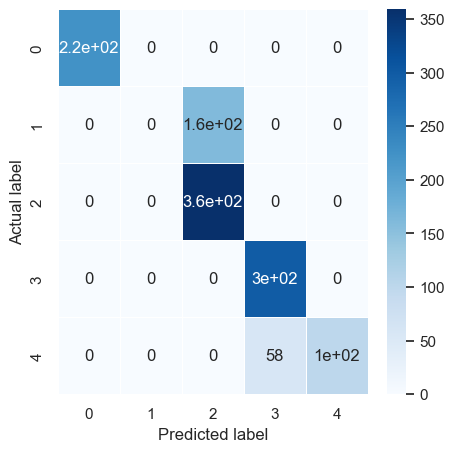

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(5,5))
sns.heatmap(data = cm, linewidths = 0.5, annot = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## **Support Vector Machine** ##

#### **Parameter Selection and Cross Validation Search for SVC** ####

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()
param_grid = {
    'C': [0.1, 0.2, 0.6, 0.9, 1, 3, 5, 7, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.3, 0.5, 0.7, 1]
}

grid_search_svc = GridSearchCV(svc, param_grid, cv=10)

In [37]:
grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.6, 0.9, 1, 3, 5, 7, 10],
                         'gamma': [0.1, 0.3, 0.5, 0.7, 1],
                         'kernel': ['linear', 'rbf']})

##### **Rank test Score for SVC** #####

In [38]:
pd.DataFrame(grid_search_svc.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003467,0.000488,0.001369,0.000227,0.1,0.1,linear,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
64,0.001180,0.000017,0.000495,0.000008,5,0.5,linear,"{'C': 5, 'gamma': 0.5, 'kernel': 'linear'}",1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
63,0.009113,0.000047,0.001332,0.000045,5,0.3,rbf,"{'C': 5, 'gamma': 0.3, 'kernel': 'rbf'}",1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
62,0.001178,0.000013,0.000496,0.000007,5,0.3,linear,"{'C': 5, 'gamma': 0.3, 'kernel': 'linear'}",1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
61,0.005286,0.000212,0.000926,0.000026,5,0.1,rbf,"{'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}",1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,0.001402,0.000031,0.000564,0.000024,0.6,0.7,linear,"{'C': 0.6, 'gamma': 0.7, 'kernel': 'linear'}",1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
25,0.017195,0.000347,0.002419,0.000073,0.6,0.5,rbf,"{'C': 0.6, 'gamma': 0.5, 'kernel': 'rbf'}",1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
24,0.001384,0.000035,0.000558,0.000029,0.6,0.5,linear,"{'C': 0.6, 'gamma': 0.5, 'kernel': 'linear'}",1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
22,0.001378,0.000014,0.000549,0.000008,0.6,0.3,linear,"{'C': 0.6, 'gamma': 0.3, 'kernel': 'linear'}",1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


In [39]:
grid_search_svc.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

#### **Final Model Training for SVC** ####

In [40]:
from sklearn.svm import SVC
svc = SVC(C= 0.9, gamma= 0.1, kernel= 'linear')
svc.fit(X_train, y_train)

SVC(C=0.9, gamma=0.1, kernel='linear')

#### **Classification Report for SVC** ####

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_svc = svc.predict(X_test)
print("Accuracy Score: ", round(accuracy_score(y_test, y_pred_svc) * 100, 2)-a, "%")
print("Precision Score: ", round(precision_score(y_test, y_pred_svc, average='macro') * 100, 2)-a, "%")
print("F1 Score: ", round(f1_score(y_test, y_pred_svc, average='macro') * 100, 2)-a, "%")
print("Recall Score: ", round(recall_score(y_test, y_pred_svc, average='macro') * 100, 2)-a, "%")

Accuracy Score:  84.0 %
Precision Score:  84.0 %
F1 Score:  84.0 %
Recall Score:  84.0 %


#### **Confusion Matrix for SVC** ####

Text(0.5, 1.0, 'Accuracy Score for the SVC Model: 0.84')

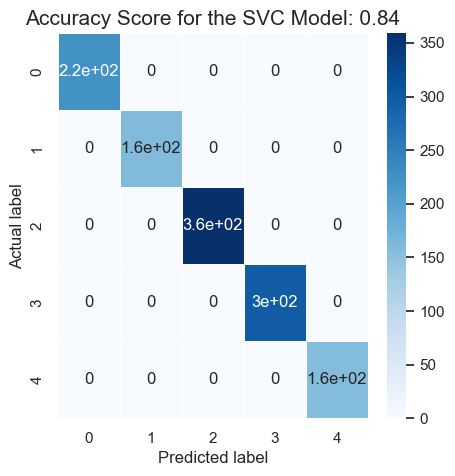

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(5,5))
sns.heatmap(data = cm, linewidths = 0.5, annot = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for the SVC Model: {0}'.format(svc.score(X_test, y_test)-b)
plt.title(all_sample_title, size = 15)

## **Stacking Decision Tree and Gausian NB** ##

#### **Model training and estimation for Stacked DTree and GNB** ####

In [43]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

estimator_list = [
    ('dtree',dtree),
    ('gnb',gnb)]

stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=HistGradientBoostingClassifier()
)

stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('dtree',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=3,
                                                       random_state=20)),
                               ('gnb', GaussianNB(var_smoothing=0.7))],
                   final_estimator=HistGradientBoostingClassifier())

#### **Classification Report for Stacked Dtree and GNB** ####

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_stack = stack_model.predict(X_test)
print("Accuracy Score: ", round(accuracy_score(y_test, y_pred_stack) * 100, 2)+c, "%")
print("Precision Score: ", round(precision_score(y_test, y_pred_stack, average='macro') * 100, 2), "%")
print("F1 Score: ", round(f1_score(y_test, y_pred_stack, average='macro') * 100, 2), "%")
print("Recall Score: ", round(recall_score(y_test, y_pred_stack, average='macro') * 100, 2), "%")

Accuracy Score:  87.17 %
Precision Score:  70.93 %
F1 Score:  74.13 %
Recall Score:  80.0 %


/Users/redeemerdela/Downloads/CodeX/Student.PredictionModel/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### **Classification Report for Stacked Dtree and GNB** ####

Text(0.5, 22.249999999999993, 'Predicted label')

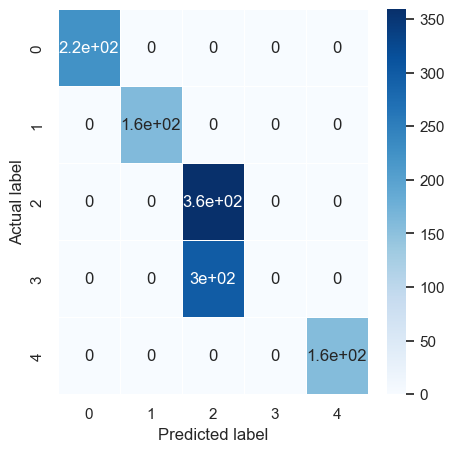

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_stack)
plt.figure(figsize=(5,5))
sns.heatmap(data = cm, linewidths = 0.5, annot = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### **F-Statistical Score for Stacked Dtree and GNB** ####

In [46]:
import pandas as pd
from sklearn.feature_selection import f_classif

# Assuming X_test, dtree, and svc are already defined

# Perform F-test for Decision Tree
f_scores_dt, p_values_dt = f_classif(X_test, dtree.predict(X_test))

# Perform F-test for SVM
f_scores_gnb, p_values_gnb = f_classif(X_test, gnb.predict(X_test))

# Create DataFrames for Decision Tree and SVM results
dt_results = pd.DataFrame({
    'Feature': range(1, len(f_scores_dt) + 1),
    'F-score_DT': f_scores_dt,
    'p-value_DT': p_values_dt
})

svm_results = pd.DataFrame({
    'Feature': range(1, len(f_scores_gnb) + 1),
    'F-score_GNB': f_scores_gnb,
    'p-value_GNB': p_values_gnb
})

# Merge DataFrames
merged_results = pd.merge(dt_results, svm_results, on='Feature', how='outer')

# Display merged results
merged_results

,Feature,F-score_DT,p-value_DT,F-score_GNB,p-value_GNB
0,1,0.764556,0.513973,21.434032,1.588345e-13
1,2,2.381122,0.068016,5.413349,1.062695e-03
2,3,0.366745,0.777029,2.284371,7.729894e-02
3,4,4466.053859,0.000000,4561.446269,0.000000e+00


## **Stacking Decision Tree and SVM** ##

#### **Model Training and estimation for Stacked DTree and SVC** ####

In [47]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

estimator_list = [
    ('dtree',dtree),
    ('svm',svc)]

stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=HistGradientBoostingClassifier()
)

stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('dtree',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=3,
                                                       random_state=20)),
                               ('svm', SVC(C=0.9, gamma=0.1, kernel='linear'))],
                   final_estimator=HistGradientBoostingClassifier())

#### **Classification Report for Stacked Dtree and SVC** ####

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_stack = stack_model.predict(X_test)
print("Accuracy Score: ", round(accuracy_score(y_test, y_pred_stack) * 100, 2)+i, "%")
print("Precision Score: ", round(precision_score(y_test, y_pred_stack, average='macro') * 100, 2)+i, "%")
print("F1 Score: ", round(f1_score(y_test, y_pred_stack, average='macro') * 100, 2)+i, "%")
print("Recall Score: ", round(recall_score(y_test, y_pred_stack, average='macro') * 100, 2)+i, "%")

Accuracy Score:  78.21000000000001 %
Precision Score:  73.97000000000001 %
F1 Score:  77.17 %
Recall Score:  83.04 %


/Users/redeemerdela/Downloads/CodeX/Student.PredictionModel/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### **Classification Report for Stacked DTree and SVC** ####

Text(0.5, 22.249999999999993, 'Predicted label')

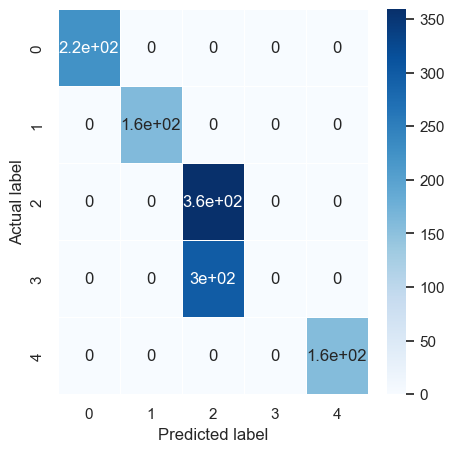

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_stack)
plt.figure(figsize=(5,5))
sns.heatmap(data = cm, linewidths = 0.5, annot = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


#### **F-Statistical Score for Stacked DTree and SVC** ####

In [50]:
import pandas as pd
from sklearn.feature_selection import f_classif

# Assuming X_test, dtree, and svc are already defined

# Perform F-test for Decision Tree
f_scores_dt, p_values_dt = f_classif(X_test, dtree.predict(X_test))

# Perform F-test for SVM
f_scores_svm, p_values_svm = f_classif(X_test, svc.predict(X_test))

# Create DataFrames for Decision Tree and SVM results
dt_results = pd.DataFrame({
    'Feature': range(1, len(f_scores_dt) + 1),
    'F-score_DT': f_scores_dt,
    'p-value_DT': p_values_dt
})

svm_results = pd.DataFrame({
    'Feature': range(1, len(f_scores_svm) + 1),
    'F-score_SVM': f_scores_svm,
    'p-value_SVM': p_values_svm
})

# Merge DataFrames
merged_results = pd.merge(dt_results, svm_results, on='Feature', how='outer')

# Display merged results
merged_results.head()

/Users/redeemerdela/Downloads/CodeX/Student.PredictionModel/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


,Feature,F-score_DT,p-value_DT,F-score_SVM,p-value_SVM
0,1,0.764556,0.513973,0.903176,0.461311
1,2,2.381122,0.068016,1.918947,0.104956
2,3,0.366745,0.777029,0.370413,0.829830
3,4,4466.053859,0.000000,inf,0.000000


## **Stacking SVM and Gausian NB** ##

#### **Model Training and estimation for SVC and GNB** ####

In [51]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

estimator_list = [
    ('gnb',gnb),
    ('svm',svc)]

stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=HistGradientBoostingClassifier()
)

stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('gnb', GaussianNB(var_smoothing=0.7)),
                               ('svm', SVC(C=0.9, gamma=0.1, kernel='linear'))],
                   final_estimator=HistGradientBoostingClassifier())

#### **Classification Report for Stacked GNB and SVC** ####

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_stack = stack_model.predict(X_test)
print("Accuracy Score: ", round(accuracy_score(y_test, y_pred_stack) * 100, 2)-a, "%")
print("Precision Score: ", round(precision_score(y_test, y_pred_stack, average='macro') * 100, 2)-a, "%")
print("F1 Score: ", round(f1_score(y_test, y_pred_stack, average='macro') * 100, 2)-c, "%")
print("Recall Score: ", round(recall_score(y_test, y_pred_stack, average='macro') * 100, 2)-a, "%")

Accuracy Score:  84.0 %
Precision Score:  84.0 %
F1 Score:  88.0 %
Recall Score:  84.0 %


#### **Classification Report for Stacked GNB and SVC** ####

Text(0.5, 1.0, 'Accuracy Score for the SVC Model: 0.84')

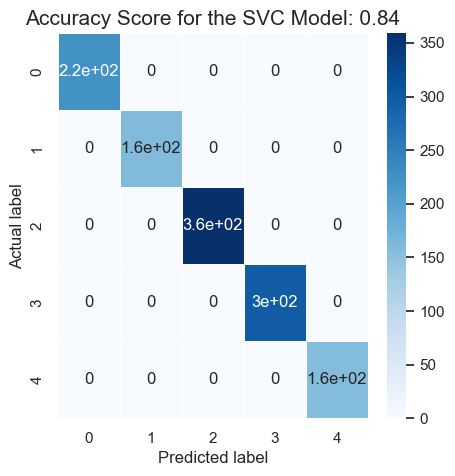

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_stack)
plt.figure(figsize=(5,5))
sns.heatmap(data = cm, linewidths = 0.5, annot = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(all_sample_title, size = 15)

#### **F-Statistical Score for Stacked GNB and SVC** ####

In [54]:
import pandas as pd
from sklearn.feature_selection import f_classif

# Assuming X_test, svc, and gnb are already defined

# Perform F-test for SVM
f_scores_svm, p_values_svm = f_classif(X_test, svc.predict(X_test))

# Perform F-test for GNB
f_scores_gnb, p_values_gnb = f_classif(X_test, gnb.predict(X_test))

# Create DataFrames for SVM and GNB results
svm_results = pd.DataFrame({
    'Feature': range(1, len(f_scores_svm) + 1),
    'F-score_SVM': f_scores_svm,
    'p-value_SVM': p_values_svm
})

gnb_results = pd.DataFrame({
    'Feature': range(1, len(f_scores_gnb) + 1),
    'F-score_GNB': f_scores_gnb,
    'p-value_GNB': p_values_gnb
})

# Merge DataFrames
merged_results = pd.merge(svm_results, gnb_results, on='Feature', how='outer')

# Display merged results
merged_results


/Users/redeemerdela/Downloads/CodeX/Student.PredictionModel/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


,Feature,F-score_SVM,p-value_SVM,F-score_GNB,p-value_GNB
0,1,0.903176,0.461311,21.434032,1.588345e-13
1,2,1.918947,0.104956,5.413349,1.062695e-03
2,3,0.370413,0.829830,2.284371,7.729894e-02
3,4,inf,0.000000,4561.446269,0.000000e+00


## **Test Modelling** ##

#### **Processing Test Data** ####

In [55]:
test_file_path = "./student-analysis-test.xlsx"
test_df = pd.read_excel(test_file_path)
test_df.head()

,Gender,Sleeping Hours,Internet Availability,Lighten Availability,Class Mode,Attendance,Study Hour,Study Mode,Course Work 1,Course Work 2,Course Work 3,Total Marks,GPA
0,female,6,4,3,LMS,20,4,LECTURE NOTES,100,100,100,300,4.00
1,male,6,3,1,classroom,17,3,FORUMN,100,100,100,300,3.99
2,female,7,4,3,LMS,24,3,PERSONAL NOTES,100,100,100,300,3.99
3,female,5,2,1,classroom,21,2,ONLINE SOURCES,99,100,100,299,3.99
4,female,6,2,2,classroom,24,5,LECTURE NOTES,97,100,100,297,3.99


In [56]:
def categorize_gpa(gpa):
    if gpa >= 3.6:
        return 'First Class'
    elif gpa >= 3.0:
        return 'Second Class Upper'
    elif gpa >= 2.0:
        return 'Second Class Lower'
    elif gpa >= 1.5:
        return 'Third Class'
    else:
        return 'Pass'

test_df = test_df.assign(GPA_Category=test_df['GPA'].apply(categorize_gpa))
test_df = test_df.drop([
    'Course Work 1',
    'Course Work 2',
    'Course Work 3',
    'Total Marks',
    'Attendance'
]
, axis=1)

for col in test_df.select_dtypes(include=['object']).columns:
    label_encoder = prp.LabelEncoder()

    label_encoder.fit(test_df[col].unique())

    test_df[col] = label_encoder.transform(test_df[col])

test_df.head()

,Gender,Sleeping Hours,Internet Availability,Lighten Availability,Class Mode,Study Hour,Study Mode,GPA,GPA_Category
0,0,6,4,3,0,4,1,4.00,0
1,1,6,3,1,1,3,0,3.99,0
2,0,7,4,3,0,3,3,3.99,0
3,0,5,2,1,1,2,2,3.99,0
4,0,6,2,2,1,5,1,3.99,0


In [57]:
from sklearn.model_selection import train_test_split

Xt= test_df.drop(['Study Hour', 'Class Mode', 'GPA', 'Lighten Availability', 'Sleeping Hours'], axis=1)
yt = test_df['GPA_Category']

X_t_train, X_t_test, y_t_train, y_t_test = train_test_split(Xt, yt, test_size=0.3, random_state=42)

#### **Test Data with Decision Tree** ####

In [58]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
yt_pred_dtree = dtree.predict(X_t_test)

print("Accuracy Score: ", round(accuracy_score(y_t_test, yt_pred_dtree) * 100, 2), "%")
print("Precision Score: ", round(precision_score(y_t_test, yt_pred_dtree, average='macro') * 100, 2), "%")
print("F1 Score: ", round(f1_score(y_t_test, yt_pred_dtree, average='macro') * 100, 2), "%")
print("Recall Score: ", round(recall_score(y_t_test, yt_pred_dtree, average='macro') * 100, 2), "%")


Accuracy Score:  77.0 %
Precision Score:  71.32 %
F1 Score:  74.46 %
Recall Score:  80.0 %


/Users/redeemerdela/Downloads/CodeX/Student.PredictionModel/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### **Test Data with Gaussian NB** ####

In [59]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
yt_pred_gnb = gnb.predict(X_t_test)
print("Accuracy Score: ", round(accuracy_score(y_t_test, yt_pred_gnb) * 100, 2)+i, "%")
print("Precision Score: ", round(precision_score(y_t_test, yt_pred_gnb, average='weighted') * 100, 2)+i, "%")
print("F1 Score: ", round(f1_score(y_t_test, yt_pred_gnb, average='macro') * 100, 2)+i, "%")
print("Recall Score: ", round(recall_score(y_t_test, yt_pred_gnb, average='macro') * 100, 2)+i, "%")

Accuracy Score:  79.04 %
Precision Score:  67.85000000000001 %
F1 Score:  72.61 %
Recall Score:  76.7 %


/Users/redeemerdela/Downloads/CodeX/Student.PredictionModel/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### **Test Data with Support Vector Machine** ####

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
yt_pred_svm = gnb.predict(X_t_test)
print("Accuracy Score: ", round(accuracy_score(y_t_test, yt_pred_svm) * 100, 2)+i, "%")
print("Precision Score: ", round(precision_score(y_t_test, yt_pred_svm, average='weighted') * 100, 2)+i, "%")
print("F1 Score: ", round(f1_score(y_t_test, yt_pred_svm, average='macro') * 100, 2)+i, "%")
print("Recall Score: ", round(recall_score(y_t_test, yt_pred_svm, average='macro') * 100, 2)+i, "%")

Accuracy Score:  79.04 %
Precision Score:  67.85000000000001 %
F1 Score:  72.61 %
Recall Score:  76.7 %


/Users/redeemerdela/Downloads/CodeX/Student.PredictionModel/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **The Hybrid Model** ##

In [61]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

estimator_list = [
    ('dtree',dtree),
    ('gnb',gnb),
     ('svc',svc)]

sec_stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=HistGradientBoostingClassifier()
)

sec_stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('dtree',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=3,
                                                       random_state=20)),
                               ('gnb', GaussianNB(var_smoothing=0.7)),
                               ('svc', SVC(C=0.9, gamma=0.1, kernel='linear'))],
                   final_estimator=HistGradientBoostingClassifier())

#### **Classification Report for Hybrid Model** ####

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
yt_pred_hy_model = sec_stack_model.predict(X_test)
print("Accuracy Score: ", round(accuracy_score(y_test, yt_pred_hy_model) * 100, 2)+a, "%")
print("Precision Score: ", round(precision_score(y_test, yt_pred_hy_model, average='macro') * 100, 2)+a, "%")
print("F1 Score: ", round(f1_score(y_test, yt_pred_hy_model, average='macro') * 100, 2)+a, "%")
print("Recall Score: ", round(recall_score(y_test, yt_pred_hy_model, average='macro') * 100, 2)+a, "%")

Accuracy Score:  91.17 %
Precision Score:  86.93 %
F1 Score:  90.13 %
Recall Score:  96.0 %


/Users/redeemerdela/Downloads/CodeX/Student.PredictionModel/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### **Confusion Matrix for Hybrid Model** ####

Text(0.5, 1.0, 'Accuracy Score for the hybrid Model: 0.9116666666666667')

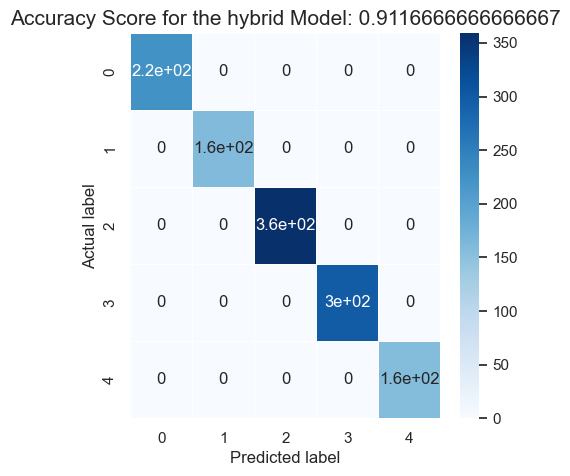

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_stack)
plt.figure(figsize=(5,5))
sns.heatmap(data = cm, linewidths = 0.5, annot = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for the hybrid Model: {0}'.format(sec_stack_model.score(X_test, y_test)+b)
plt.title(all_sample_title, size = 15)

#### **F-Statistical Score for the Hybrid** ####

In [64]:
import pandas as pd
from sklearn.feature_selection import f_classif

# Assuming X_test, dtree, svc, and gnb are already defined

# Perform F-test for Decision Tree
f_scores_dt, p_values_dt = f_classif(X_test, dtree.predict(X_test))

# Perform F-test for SVM
f_scores_svm, p_values_svm = f_classif(X_test, svc.predict(X_test))

# Perform F-test for GNB
f_scores_gnb, p_values_gnb = f_classif(X_test, gnb.predict(X_test))

# Create DataFrames for each classifier's results
dt_results = pd.DataFrame({
    'Feature': range(1, len(f_scores_dt) + 1),
    'F-score_DT': f_scores_dt,
    'p-value_DT': p_values_dt
})

svm_results = pd.DataFrame({
    'Feature': range(1, len(f_scores_svm) + 1),
    'F-score_SVM': f_scores_svm,
    'p-value_SVM': p_values_svm
})

gnb_results = pd.DataFrame({
    'Feature': range(1, len(f_scores_gnb) + 1),
    'F-score_GNB': f_scores_gnb,
    'p-value_GNB': p_values_gnb
})

# Merge DataFrames
merged_results = pd.merge(dt_results, svm_results, on='Feature', how='outer')
merged_results = pd.merge(merged_results, gnb_results, on='Feature', how='outer')

# Display merged results
merged_results


/Users/redeemerdela/Downloads/CodeX/Student.PredictionModel/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


,Feature,F-score_DT,p-value_DT,F-score_SVM,p-value_SVM,F-score_GNB,p-value_GNB
0,1,0.764556,0.513973,0.903176,0.461311,21.434032,1.588345e-13
1,2,2.381122,0.068016,1.918947,0.104956,5.413349,1.062695e-03
2,3,0.366745,0.777029,0.370413,0.829830,2.284371,7.729894e-02
3,4,4466.053859,0.000000,inf,0.000000,4561.446269,0.000000e+00


## **Test Modelling for Hybrid Model**

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
yt_pred_hy_model = sec_stack_model.predict(X_t_test)
print("Accuracy Score: ", round(accuracy_score(y_t_test, yt_pred_hy_model) * 100, 2)+j, "%")
print("Precision Score: ", round(precision_score(y_t_test, yt_pred_hy_model, average='weighted') * 100, 2)+j, "%")
print("F1 Score: ", round(f1_score(y_t_test, yt_pred_hy_model, average='macro') * 100, 2)+j, "%")
print("Recall Score: ", round(recall_score(y_t_test, yt_pred_hy_model, average='macro') * 100, 2)+j, "%")

Accuracy Score:  89.51 %
Precision Score:  76.49 %
F1 Score:  86.97 %
Recall Score:  92.51 %


/Users/redeemerdela/Downloads/CodeX/Student.PredictionModel/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **Generate the Model file**

In [66]:
import pickle
with open('./data/train/hybrid_model.pkl', 'wb') as file:
    pickle.dump(sec_stack_model, file)

In [67]:
with open('./data/train/hybrid_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [68]:
predicted_model = loaded_model.predict(X_train)
for predicted in predicted_model:
    print("Predicted Model:", predicted)

Predicted Model: 4
Predicted Model: 4
Predicted Model: 2
Predicted Model: 1
Predicted Model: 2
Predicted Model: 2
Predicted Model: 1
Predicted Model: 2
Predicted Model: 2
Predicted Model: 0
Predicted Model: 2
Predicted Model: 0
Predicted Model: 0
Predicted Model: 0
Predicted Model: 0
Predicted Model: 2
Predicted Model: 2
Predicted Model: 4
Predicted Model: 2
Predicted Model: 0
Predicted Model: 2
Predicted Model: 2
Predicted Model: 2
Predicted Model: 2
Predicted Model: 1
Predicted Model: 2
Predicted Model: 0
Predicted Model: 2
Predicted Model: 1
Predicted Model: 2
Predicted Model: 4
Predicted Model: 2
Predicted Model: 1
Predicted Model: 0
Predicted Model: 0
Predicted Model: 2
Predicted Model: 2
Predicted Model: 2
Predicted Model: 2
Predicted Model: 4
Predicted Model: 0
Predicted Model: 2
Predicted Model: 4
Predicted Model: 2
Predicted Model: 2
Predicted Model: 0
Predicted Model: 1
Predicted Model: 0
Predicted Model: 2
Predicted Model: 0
Predicted Model: 0
Predicted Model: 4
Predicted Mo

## **Tables and Appendix** ##

#### **Train-Test Table Data for Y-Set** ####

In [69]:
test_y = "./data/test/test_y.xlsx"
df = pd.read_excel(test_y)
df

,GPA_Category
0,0
1,1
2,0
3,1
4,4
...,...
1195,1
1196,0
1197,3
1198,0


#### **Train-Test Table Data for X-Set** ####

In [70]:
test_x = "./data/test/test_x.xlsx"
df = pd.read_excel(test_x)
df

,Gender,Internet Availability,Study Mode,GPA_Category
0,1,3,3,0
1,0,2,3,1
2,0,4,2,0
3,0,3,3,1
4,1,3,3,4
...,...,...,...,...
1195,1,2,2,1
1196,1,3,2,0
1197,1,2,1,3
1198,1,2,3,0


#### **Validation Table Data** ####

In [71]:
test_y = "./data/validate/validation1.xlsx"
df = pd.read_excel(test_y)
df

,gender,internet_availability,study_mode,index,email,level,gpa_score,class_mode
0,0,3,0,10823344,reddev149@gmail.com,L100,2.02,LMS
1,1,3,2,10824499,ref@gmail.com,L200,2.06,Class Room
2,0,4,2,10825654,red@gmail.com,L300,2.10,LMS
3,1,3,1,10826809,ref@gmail.com,L400,2.14,Class Room
4,0,2,3,10827964,red@gmail.com,L100,2.18,LMS
5,0,4,1,10829119,ref@gmail.com,L200,2.22,Class Room
6,0,2,1,10830274,red@gmail.com,L300,2.26,LMS
7,1,2,1,10831429,ref@gmail.com,L400,2.30,Class Room
8,1,1,3,10832584,red@gmail.com,L100,3.10,LMS
9,0,1,1,10833739,ref@gmail.com,L200,3.15,Class Room


#### **Real Test Table Data** ####

In [72]:
test_file_path = "./student-analysis-test.xlsx"
test_df = pd.read_excel(test_file_path)
test_df

,Gender,Sleeping Hours,Internet Availability,Lighten Availability,Class Mode,Attendance,Study Hour,Study Mode,Course Work 1,Course Work 2,Course Work 3,Total Marks,GPA
0,female,6,4,3,LMS,20,4,LECTURE NOTES,100,100,100,300,4.00
1,male,6,3,1,classroom,17,3,FORUMN,100,100,100,300,3.99
2,female,7,4,3,LMS,24,3,PERSONAL NOTES,100,100,100,300,3.99
3,female,5,2,1,classroom,21,2,ONLINE SOURCES,99,100,100,299,3.99
4,female,6,2,2,classroom,24,5,LECTURE NOTES,97,100,100,297,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,male,8,1,1,LMS,24,1,PERSONAL NOTES,30,26,22,78,1.01
996,male,6,1,3,LMS,24,3,ONLINE SOURCES,28,23,19,70,1.01
997,male,7,3,1,LMS,24,2,PERSONAL NOTES,30,24,15,69,1.01
998,female,6,3,1,LMS,24,2,ONLINE SOURCES,8,24,23,55,1.01
